In [880]:
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pdb import set_trace
from data.data_utils import load_dataset
import random

np.random.seed(42)

# Gradient descent that learns the weights of a logistic regression model

In [881]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')

In [882]:
y_train, y_valid, y_test = y_train[:,1,None], y_valid[:,1,None], y_test[:,1,None]

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

# for w0 in w0 + wi * xi
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
x_test  = np.hstack([np.ones((x_test.shape[0], 1)), x_test])

In [883]:
y_train[:10]

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

In [884]:
x_train.shape

(135, 5)

In [885]:
def sigmoid(z):
    return scipy.special.expit(z)

def negative_log_likelihood(x, y, w):
    z = x.dot(w)
    f = sigmoid(z)
    return -np.sum(y * np.log(f) + (1-y) * np.log(1 - f))

def gradient_neg_log_likelihood(x, y, w):
    z = x.dot(w)
    f = sigmoid(z)
    # print(y)
    x = x.reshape(-1,w.shape[0])
    # print(x.shape)
    return -np.dot(x.T, y-f.reshape(-1,1)) #column

epochs = 5000

## Full batch

In [886]:
def full_batch_MLE(x_train, y_train, x_test, y_test, lr):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1], 1))
    # print(w.shape)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        # Compute Full-Batch Gradient
        grad_w = gradient_neg_log_likelihood(x_train, y_train, w)
        # print(grad_w.shape)
        w  -= lr * grad_w
        # Compute the training error
        train_error = negative_log_likelihood(x_train, y_train, w)
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")
    # Compute the testing error
    test_error = negative_log_likelihood(x_test, y_test, w_best)

    # plot training error versus epochs
    # plt.plot(range(1, epochs+1), train_errors, label='full batch GD')
    
    # Print the final testing error (root mean squared error)
    print(f"Test Negative_log_likelihood = {test_error}")
    z = x_test.dot(w_best)
    f_test = sigmoid(z)
    accuracy = np.mean( (f_test>0.5) == y_test )
    print("Accuracy %s" %str(accuracy))
    return epochs, train_errors
epochs, full_training_errors = full_batch_MLE(x_train, y_train, x_test, y_test, 0.01)

Epoch 0: Training error = 81.40912819330848
Epoch 500: Training error = 65.813806270622
Epoch 1000: Training error = 65.79467645842914
Epoch 1500: Training error = 65.79437376332653
Epoch 2000: Training error = 65.79436884950043
Epoch 2500: Training error = 65.79436876947031
Epoch 3000: Training error = 65.79436876816632
Epoch 3500: Training error = 65.79436876814509
Epoch 4000: Training error = 65.79436876814474
Epoch 4500: Training error = 65.79436876814472
Test Negative_log_likelihood = 6.912966518926425
Accuracy 0.7333333333333333


## Mini Batch Stochastic size = 1

Epoch 0: Training error = 93.05431791324077
Epoch 500: Training error = 73.88055936190923
Epoch 1000: Training error = 70.75412800463903
Epoch 1500: Training error = 69.8021757734043
Epoch 2000: Training error = 68.96250067767447
Epoch 2500: Training error = 68.04233380274654
Epoch 3000: Training error = 68.05799082511142
Epoch 3500: Training error = 67.5451325665358
Epoch 4000: Training error = 67.43204713343451
Epoch 4500: Training error = 67.32178511292503
Test Negative_log_likelihood = 7.037257829056104
Accuracy 0.7333333333333333


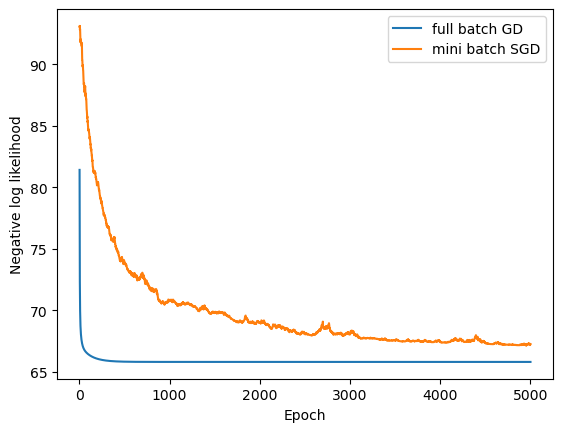

In [887]:
def mini_batch_MLE(x_train, y_train, x_test, y_test, lr):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1],1)) 
    # print(w.shape)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        i = random.randint(0, len(y_train)-1)
        x_batch = x_train[i]
        # print(x_batch.shape)
        grad_w = gradient_neg_log_likelihood(x_batch, y_train[i], w)
        # Update the weights
        w -= lr * grad_w
        train_error = negative_log_likelihood(x_train, y_train, w)
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the testing error
    test_error = negative_log_likelihood(x_test, y_test, w)    
    # Print the final testing error (root mean squared error)
    print(f"Test Negative_log_likelihood = {test_error}")
    z = x_test.dot(w)
    f_test = sigmoid(z)
    accuracy = np.mean( (f_test>0.5) == y_test )
    print("Accuracy %s" %str(accuracy))
    return epochs, train_errors

epochs2, batch_training_errors = mini_batch_MLE(x_train, y_train, x_test, y_test, 0.01)

plt.plot(range(1, epochs+1), full_training_errors, label='full batch GD')
plt.plot(range(1, epochs2+1), batch_training_errors, label='mini batch SGD')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Epoch')
plt.ylabel('Negative log likelihood')
plt.legend(loc='best')
plt.show()